In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import statsmodels.api as sm
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
data=pd.read_csv(r'C:\Users\Purpl3\Dataset.csv')

In [3]:
data.shape

(306, 4)

In [4]:
data.head(15)

,Age,Year,Axillary,Survival
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes
5,33,58,10,Yes
6,33,60,0,Yes
7,34,59,0,No
8,34,66,9,No
9,34,58,30,Yes


In [5]:
data.dtypes

Age          int64
Year         int64
Axillary     int64
Survival    object
dtype: object

In [6]:
data.describe().iloc[3:,:]

,Age,Year,Axillary
min,30.00,31.00,0.0
25%,44.00,60.00,0.0
50%,52.00,63.00,1.0
75%,60.75,65.75,4.0
max,83.00,69.00,52.0


In [7]:
data.describe()

,Age,Year,Axillary
count,306.000000,306.000000,306.000000
mean,52.457516,62.754902,3.980392
std,10.803452,3.723482,7.172324
min,30.000000,31.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


<Axes: >

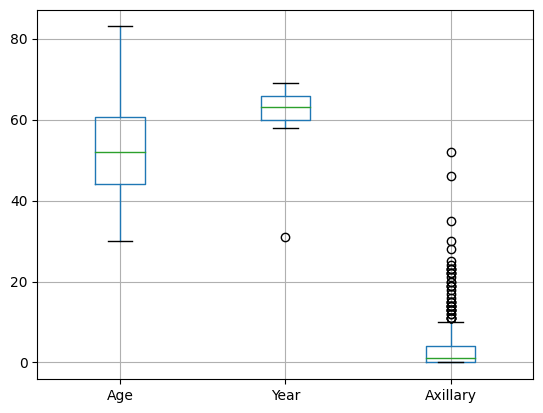

In [8]:
data.boxplot()

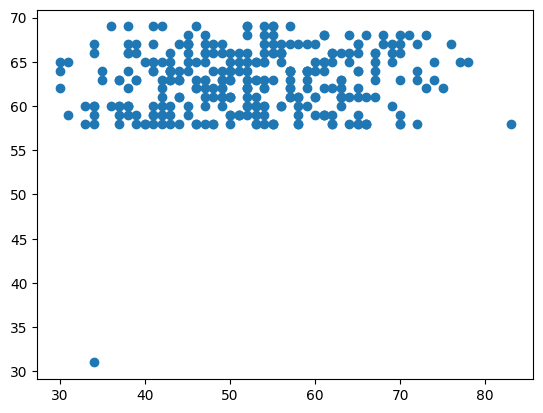

In [9]:
plt.scatter(data['Age'] , data['Year'])

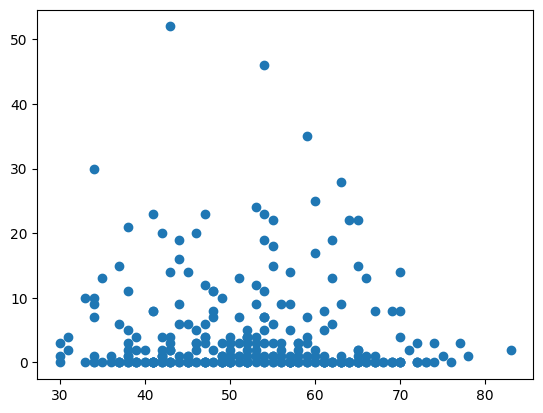

In [10]:
plt.scatter(data['Age'] , data['Axillary'])

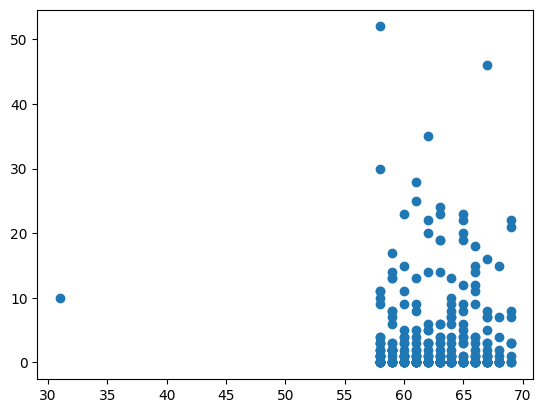

In [11]:
plt.scatter(data['Year'] , data['Axillary'])

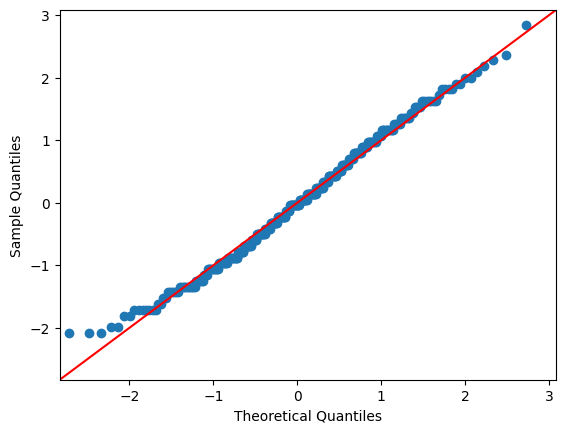

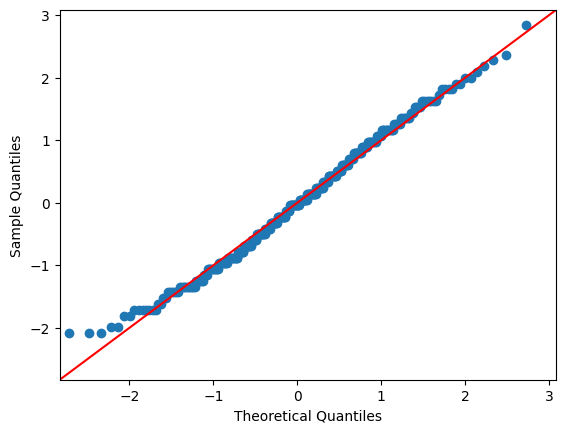

In [12]:
sm.qqplot(data['Age'] , fit=True , line='45')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Axillary'}>, <Axes: >]], dtype=object)

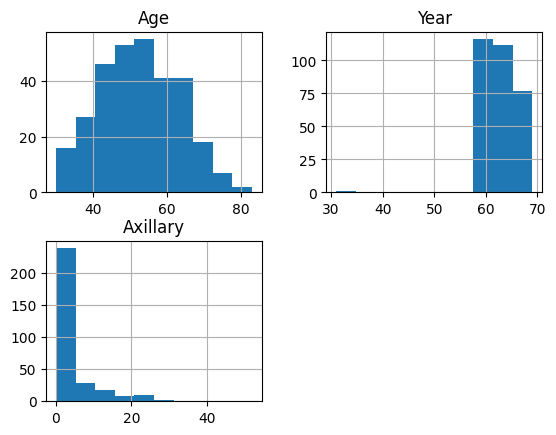

In [13]:
data.hist()

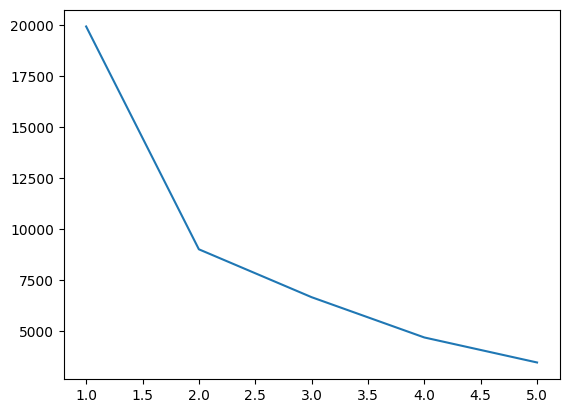

In [14]:
from sklearn.cluster import KMeans
x=data.iloc[:, [1,2]].values
WCSS=[]
for i in range(1,6):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=10)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1,6), WCSS)
plt.show()

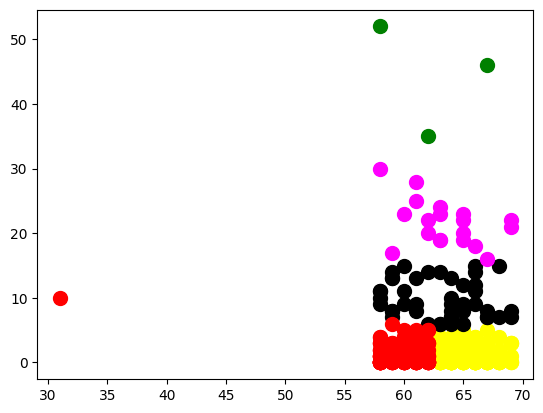

In [15]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='yellow', label='Cluster 1')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='black', label='Cluster 2')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s=100, c='red', label ='Cluster 4')
plt.scatter(x[y_kmeans==4, 0], x[y_kmeans==4, 1], s=100, c='magenta', label='Cluster 5')

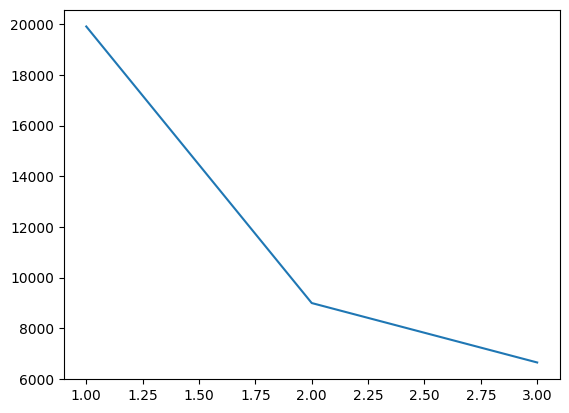

In [16]:
wcss = []
for I in range(1,4):
    kmeans = KMeans(n_clusters=I, init='k-means++', max_iter=300, n_init=10, random_state=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,4), wcss)
plt.show()

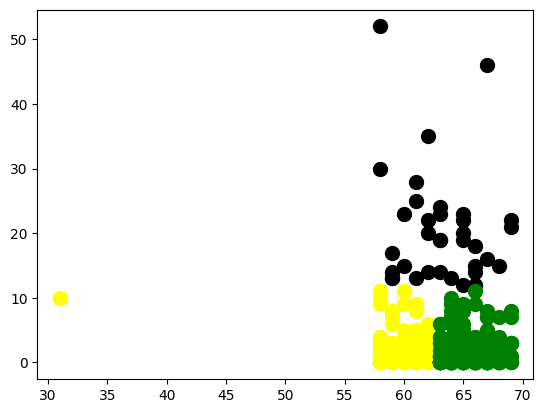

In [17]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10,
random_state=0)
y_kmeans = kmeans.fit_predict(x)
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='yellow', label='Cluster 1')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='black', label='Cluster 2')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green', label='Cluster 3')

In [18]:
hc = AgglomerativeClustering(n_clusters=5)
y_hc = hc.fit_predict(x)

In [19]:
import sys
with np.printoptions(threshold=sys.maxsize) :
    print(y_hc)

[1 1 1 0 1 2 0 0 2 3 0 0 2 0 2 1 0 1 0 1 0 2 2 1 3 0 0 0 1 1 1 2 0 1 1 1 1
 0 0 1 0 0 1 3 1 1 0 2 0 1 2 1 1 1 0 0 0 0 1 3 1 1 4 0 1 1 2 1 1 0 1 1 1 2
 2 3 0 1 0 3 2 1 1 0 1 2 1 1 1 0 1 1 3 0 0 1 3 0 1 0 1 1 1 0 1 1 2 2 2 2 2
 1 1 1 1 2 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 2 0 2 0 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 0 1 0 2 3 2 0 0 0 0 1 2 3 1 2 2 0 1 4 0 2 3 0 0 1 3 0 0 0
 3 1 1 3 1 2 1 0 1 1 1 0 1 2 1 2 1 0 0 1 1 1 1 0 0 0 1 0 0 0 3 0 1 1 1 1 2
 1 2 1 0 1 3 1 1 1 1 0 0 1 2 1 0 2 0 3 1 1 1 0 0 0 0 1 1 1 2 3 0 3 1 0 1 0
 0 3 3 0 1 1 0 1 1 0 2 0 0 1 2 1 1 1 0 1 1 1 2 0 1 1 0 0 3 1 1 2 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 0]


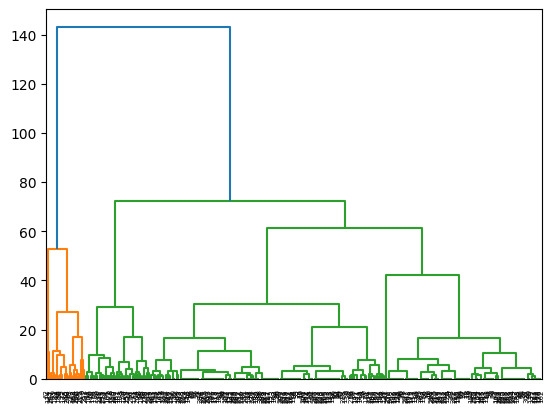

In [20]:
dendogram = sch.dendrogram(sch.linkage(x, method='ward'))

In [21]:
x = data.iloc[:,[0,1]].values
y = data.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
random_state=0)

In [22]:
tree=DecisionTreeClassifier()
classifier = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
classifier.fit(x_train, y_train)
y_test

array(['No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'], dtype=object)

In [23]:
y_predict = classifier.predict(x_test)
print (y_predict)

['No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes'
 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes'
 'No' 'Yes']


In [24]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[10, 21],
       [ 9, 37]], dtype=int64)

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.6103896103896104


In [26]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(229, 2) (77, 2) (229,) (77,)


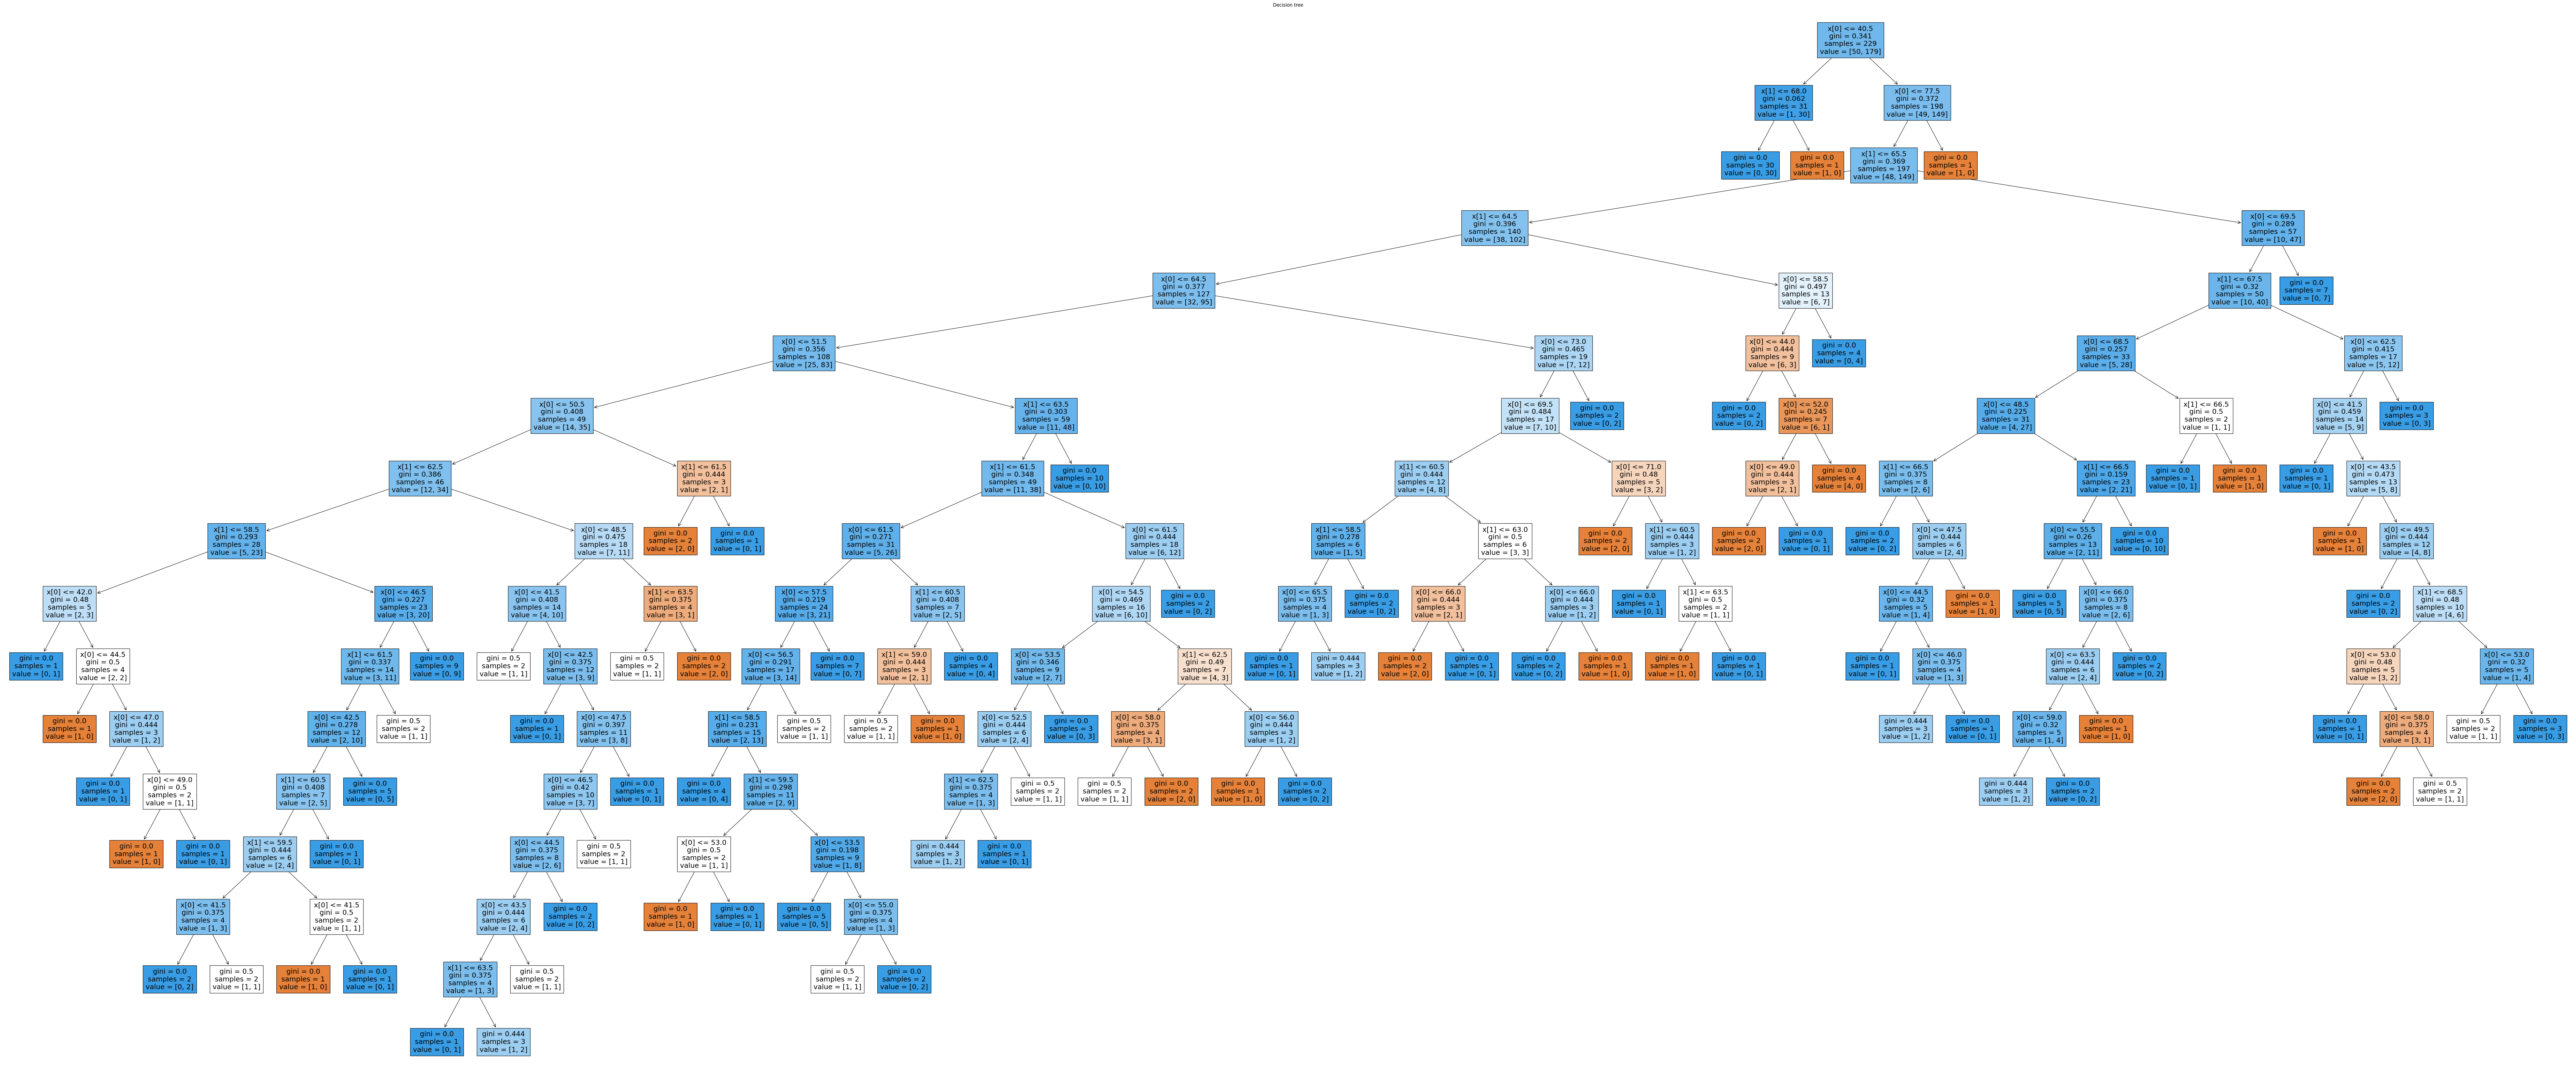

In [29]:
clf = DecisionTreeClassifier()
plt.figure(figsize=(120,50))
clf = clf.fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree")
plt.show()

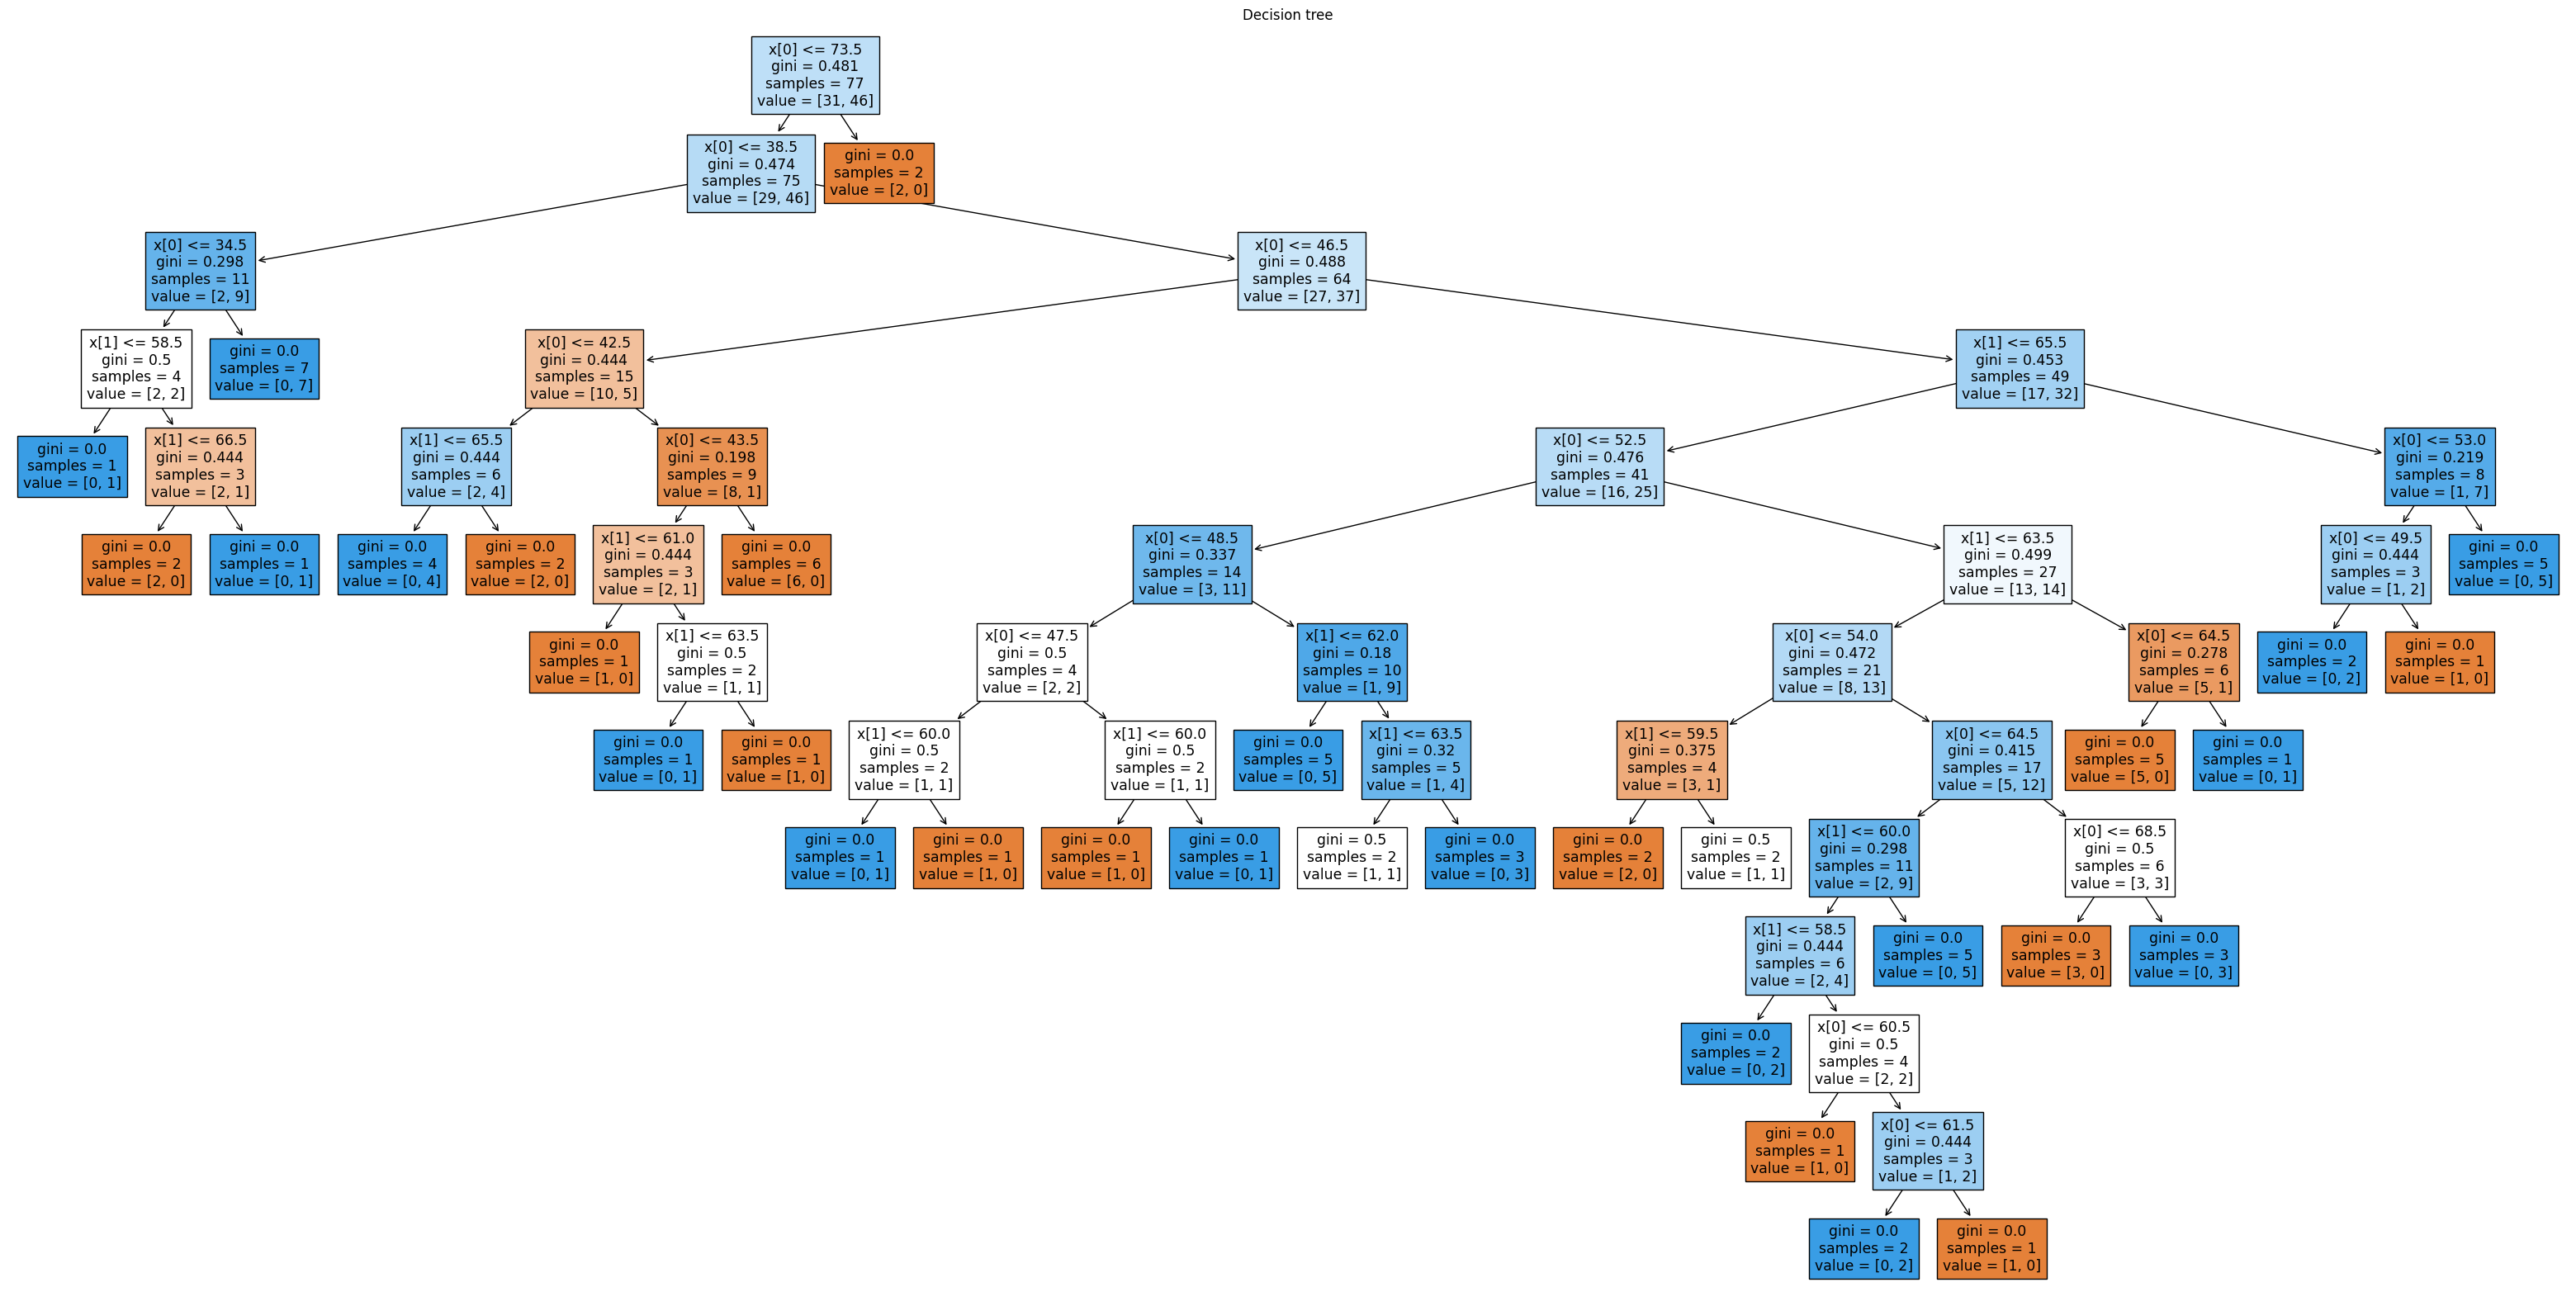

In [30]:
clf = DecisionTreeClassifier()
plt.figure(figsize=(40,20))
clf = clf.fit(x_test, y_test)
plot_tree(clf, filled=True)
plt.title("Decision tree")
plt.show()

In [31]:
X = data.iloc[:, [0,1]].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25, random_state=0)

In [32]:
classifer1 = GaussianNB()
classifer1.fit(X_train, y_train)
y_predict1 = classifer1.predict(X_test)
y_predict1

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes'], dtype='<U3')

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict1))

Accuracy: 0.5974025974025974


In [34]:
cm1 = confusion_matrix(y_test, y_predict1)
cm1

array([[ 0, 31],
       [ 0, 46]], dtype=int64)